In [1]:
# Want to find out if df['CO2 Emissions per Capita (metric tonnes)'] is affected by what Country the city is located

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim
import seaborn
from  matplotlib import pyplot
from matplotlib.pyplot import figure
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_excel('Cities.xls', index_col=0, skipinitialspace=True) # Read with excel index. 
# Skip all white-spaces.


In [3]:
df.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),CO2 Emissions per Capita (metric tonnes),Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,2.197802,NaN,0.00000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.20,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.8,31.19,81.0,0.78,45.0,72.0,14.300000,NaN,7468900.983,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,1.264223,600.0,15.17067,2.0,33.0,55.0,58.0,143.12,35.57,138.17,3955000,2543,1500,316060,462816,715525,350883,89.4,1.2,39358.0,5.50,79.04,44.30,72.93,76.07,139.62,NaN,NaN,82.0,60.23,86.9,0.74,50.0,77.0,10.200000,26.77,8636838.530,8.653670e+09,107.503591,48571.0,1001.948856,4.948413,2.876305,1.036985,0.001626,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1435000,130,11100,248392,541978,960996,741379,18.7,3.5,427.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,61.8,NaN,2.4,0.04,NaN,NaN,0.106861,NaN,2134329.200,3.496995e+09,97.860119,13033.0,1638.451450,6.161297,3.187450,1.019423,0.000095,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,0.000000,0.000000,0.000000,0,14.5,NaN,0.143000,NaN,0.149000,1.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,160.60,40.78,189.18,7445000,868,8600,520495,1149423,1391900,608994,33.6,6.3,3425.0,6.84,41.73,17.15,37.25,22.72,23.47,0.340,5.4,76.0,54.64,50.1,0.31,35.0,35.0,1.700368,89.66,8079366.816,1.156634e+09,300.370541,15881.0,143.158938,5.205795,2.870473,1.097533,0.000921,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8

In [4]:
df = df.rename(columns={"CO2 Emissions per Capita (metric tonnes)": "Target"})
df.head()

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,Subway Age (years),BRT Length (km),BRT System Length Density (per km),BRT Stations per Hundred Thousand Persons,BRT Fleet per Hundred Thousand Persons,BRT Annual Ridership per Capita,BRT Age (years),Bikeshare Stations,Bikeshare Stations per Hundred Thousand Persons,Bikeshare Number of Bikes,Bikeshare Bicycles per Hundred Thousand Persons,Bikeshare Age (years),Congestion (%),Congestion AM Peak (%),Congestion PM Peak (%),Traffic Index,Travel Time Index,Inefficiency Index,Population,Land Area (sq. km),Population Density (per sq. km),Population Change 1990 – 2000,Population Change 2000 – 2010,Population Change 2010 – 2020,Population Change 2020 – 2025,Urbanization Rate 2015 (%),Urbanization Rate Change 2015 – 2025 (pp),GDP per Capita (USD),Unemployment Rate (%),Cost of Living Index,Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Gini Coefficient,Poverty Rate (%),Life Expectancy (years),Safety Index,Internet Penetration,Digital Penetration,Innovation Index,Smartphone Penetration (%),Target,Pollution Index,Street length total (m),Street Length Density (m/sq. km),Street Length Average (m),Intersection Count,Intersection Density (per sq. km),Degree Average,Streets per Node,Circuity,Self-Loop Proportion,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,34,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,2.197802,NaN,0.00000,2.0,19.0,33.0,46.0,148.97,36.90,150.22,2275000,1857,1200,233673,332204,399059,195708,81.6,1.7,58789.0,7.20,77.33,48.58,76.48,78.28,150.69,0.443,22.9,78.8,31.19,81.0,0.78,45.0,72.0,14.300000,NaN,7468900.983,7.604833e+09,148.013337,28660.0,1018.199702,5.021972,2.869906,1.067736,0.007910,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,50,1.264223,600.0,15.17067,2.0,33.0,55.0,58.0,143.12,35.57,138.17,3955000,2543,1500,316060,462816,715525,350883,89.4,1.2,39358.0,5.50,79.04,44.30,72.93,76.07,139.62,NaN,NaN,82.0,60.23,86.9,0.74,50.0,77.0,10.200000,26.77,8636838.530,8.653670e+09,107.503591,48571.0,1001.948856,4.948413,2.876305,1.036985,0.001626,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1435000,130,11100,248392,541978,960996,741379,18.7,3.5,427.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.6,61.8,NaN,2.4,0.04,NaN,NaN,0.106861,NaN,2134329.200,3.496995e+09,97.860119,13033.0,1638.451450,6.161297,3.187450,1.019423,0.000095,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,24.5,0.0,0.000000,0.000000,0.000000,0,14.5,NaN,0.143000,NaN,0.149000,1.0,0,0.000000,0.0,0.00000,0.0,NaN,NaN,NaN,160.60,40.78,189.18,7445000,868,8600,520495,1149423,1391900,608994,33.6,6.3,3425.0,6.84,41.73,17.15,37.25,22.72,23.47,0.340,5.4,76.0,54.64,50.1,0.31,35.0,35.0,1.700368,89.66,8079366.816,1.156634e+09,300.370541,15881.0,143.158938,5.205795,2.870473,1.097533,0.000921,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,18.8,0.0,0.000000,0.000000,0.000000,0,

In [5]:
dummy = pd.get_dummies(df['Country'])
dummy.head()

,Afghanistan,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,Belarus,Belgium,Benin,Bolivia,Brazil,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Chad,Chile,China,Colombia,Congo,Costa Rica,Cuba,Czech Republic,Democratic Republic of the Congo,Denmark,Dominican Republic,Ecuador,Egypt,El Salvador,Ethiopia,Finland,France,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Haiti,Honduras,Hong Kong,Hungary,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Ivory Coast,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Laos,Lebanon,Liberia,Libya,Madagascar,Malaysia,Mali,Mauritania,Mexico,Mongolia,Morocco,Mozambique,Myanmar,Nepal,Netherlands,New Zealand,Nicaragua,Niger,Nigeria,North Korea,Norway,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Romania,Russia,Rwanda,Saudi Arabia,Senegal,Serbia,Sierra Leone,Singapore,Slovakia,Somalia,South Africa,South Korea,Spain,Sudan,Sweden,Switzerland,Syria,Taiwan,Tanzania,Thailand,Togo,Tunisia,Turkey,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
327,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
url = 'https://stats.idre.ucla.edu/stat/data/hsb2.csv'

hsb2 = pd.read_csv(url)
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [7]:
# df['CO2 Emissions per Capita (metric tonnes)']

In [8]:
mod = ols("Target ~ Country", data=df)
# mod = ols("write ~ C(race)", data=hsb2)
res = mod.fit()
print(res.summary())
# The summary shows that although p values differ between countries, generally the country is not significant.


                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     5.555
Date:                Fri, 13 Nov 2020   Prob (F-statistic):           1.82e-27
Time:                        10:37:40   Log-Likelihood:                -849.27
No. Observations:                 331   AIC:                             1947.
Df Residuals:                     207   BIC:                             2418.
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [9]:
# Will try to see if clustering the pollution of cities reveals anything about its location in the world. 

In [10]:
df['Country'].unique()

array(['United States', 'Australia', 'Niger', 'Vietnam', 'China',
       'France', 'Uruguay', 'Poland', 'Russia', 'India', 'Philippines',
       'Ivory Coast', 'Cameroon', 'United Arab Emirates', 'Ukraine',
       'Nicaragua', 'Nepal', 'Bangladesh', 'Pakistan', 'United Kingdom',
       'Angola', 'Bolivia', 'Iraq', 'Morocco', 'Germany', 'Algeria',
       'Kenya', 'Spain', 'South Korea', 'Malaysia', 'Canada', 'Finland',
       'Turkey', 'Ireland', 'Mexico', 'Somalia', 'Peru', 'Indonesia',
       'Libya', 'Democratic Republic of the Congo', 'Myanmar', 'Italy',
       'Chile', 'Thailand', 'Netherlands', 'Japan', 'Madagascar',
       'Brazil', 'Slovakia', 'Hungary', 'South Africa', 'Paraguay',
       'Iran', 'Greece', 'Chad', 'Israel', 'Venezuela', 'New Zealand',
       'Egypt', 'Argentina', 'Uganda', 'Syria', 'Saudi Arabia',
       'Portugal', 'Denmark', 'Serbia', 'Burkina Faso', 'Ecuador',
       'Colombia', 'Mozambique', 'Tunisia', 'Nigeria', 'Sierra Leone',
       'Singapore', 'Belarus'

In [11]:
len(df['City'].unique())
country_group = df.groupby('Country')
city_df = country_group.apply(lambda x: x['City'].unique())

In [12]:
cities_usa = list(city_df['United States'])
cities_usa

['Baltimore(MD)',
 'Milwaukee(WI)',
 'Austin(TX)',
 'Chicago(IL)',
 'Atlanta(GA)',
 'Los Angeles(CA)',
 'Richmond(VA)',
 'Tucson(AZ)',
 'Las Vegas(NV)',
 'Boston(MA)',
 'Nashville-Davidson(TN)',
 'Denver-Aurora(CO)',
 'Louisville(KY)',
 'Detroit(MI)',
 'New York(NY)',
 'Birmingham(AL)',
 'Indianapolis(IN)',
 'Miami(FL)',
 'Oklahoma City(OK)',
 'Kansas City(MO)',
 'Rochester(NY)',
 'Minneapolis-St. Paul(MN)',
 'Orlando(FL)',
 'Portland(OR)',
 'El Paso(TX)',
 'Philadelphia(PA)',
 'Tampa-St. Petersburg(FL)',
 'Charlotte(NC)',
 'Honolulu(HI)',
 'Cleveland(OH)',
 'Sacramento(CA)',
 'Virginia Beach(VA)',
 'Phoenix-Mesa(AZ)',
 'Washington(DC)',
 'Memphis(TN)',
 'Seattle(WA)',
 'Columbus(OH)',
 'Pittsburgh(PA)',
 'Salt Lake City(UT)',
 'Hartford(CT)',
 'Cincinnati(OH)',
 'San Francisco Bay Area(CA)',
 'Buffalo(NY)',
 'Allentown-Bethlehem(PA)',
 'St. Louis(MO)',
 'Dayton(OH)',
 'San Diego(CA)',
 'Dallas-Fort Worth(TX)',
 'Raleigh(NC)',
 'Providence(RI)',
 'McAllen(TX)',
 'Jacksonville(FL)',
 'S

In [13]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="user_agent")
location = geolocator.geocode("Melbourne") # Melbourne
# print(location.address)
lat_long = (location.latitude, location.longitude)
print(lat_long[0], lat_long[1])

-37.8142176 144.9631608


In [14]:
def add_coordinates(city):
    """
    This functon will add long. lat. coordinates for each city as a new column
    """

    if city != str:
        city = str(city)
    if city == "Baltimore(MD)":
        city = "Baltimore"
    if city == "Birmingham(AL)":
        city = "Birmingham"
    if city == "Valencia(VZL)":
        city = "Valencia"
    if city == "Tampa-St. Petersburg(FL)":
        city = "St. Petersburg, Florida"
    geolocator = Nominatim(user_agent="user_agent")
    # print(city)
    location = geolocator.geocode(city)
    lat_long = (location.latitude, location.longitude)
    return lat_long
    # print(location.address)


In [15]:
x = add_coordinates("St. Petersburg, Florida")
print(x)

(27.7703796, -82.6695085)


In [16]:
df["coordinates"] = df["City"].apply(add_coordinates)

In [17]:
df["coordinates"].head()

284      (39.2908816, -76.610759)
9      (-37.8142176, 144.9631608)
185         (13.524834, 2.109823)
327     (21.0294498, 105.8544441)
66         (43.419754, 87.319461)
Name: coordinates, dtype: object

In [18]:

def geo_position(country, coordinates):
    """
    This function produces the regions of where a city is located depending on its coordinates.
    """
    # Some of the countries coord. are hard to capture, so they will be hard coded
    if country in ['Finland', 'Denmark', 'Sweden', 'Iceland', 'Norway']:
        return 'Nordic'
    if country == 'United States':
        return 'USA'
    if country == 'Canada':
        return 'Canada'
    if country == 'Russia':
        return 'Russia'
#     if country == 'Australia':
#         return 'Australia'
    if country in ['India', 'Bangladesh']:
        return 'West Asia'
#     if country == 'Bangladesh':
#         return 'West Asia'
    if country in ['Australia', 'New Zealand']:
        return 'Oceania'
#     if country == 'Australia':
#         return 'Australia'
    # coordnates[0] = 'latitude', coordnates[1] = 'longitude'
    # South America
    if coordinates[1] < float(28.0) and coordinates[1] > float(-130.0):
        if coordinates[0] < float(30) and coordinates[0] > float(2.5):
            return 'North South America'
        if coordinates[0] < float(2.5) and coordinates[0] > float(-34.0):
            return 'Mid South America'
        if coordinates[0] < float(-34.0):
            return 'South South America'
    # West Europe    
    if coordinates[0] < float(59.0) and coordinates[0] > float(46.0) and coordinates[1] < float(15.22) and coordinates[1] > float(-11):
        return 'West Europe'
    # South Europe
    if coordinates[0] < float(46.0) and coordinates[0] > float(35.45) and coordinates[1] < float(21.11) and coordinates[1] > float(-10):
        return 'South Europe'
    # East Europe
    if coordinates[0] < float(59.0) and coordinates[0] > float(39.0) and coordinates[1] < float(50.0) and coordinates[1] > float(15.22):
        return 'East Europe'
    # Middle East
    if coordinates[0] < float(39.3) and coordinates[0] > float(12.0) and coordinates[1] < float(71) and coordinates[1] > float(34):
        return 'Middle East'
    # West Asia
    if coordinates[0] < float(46.0) and coordinates[0] > float(23) and coordinates[1] < float(100) and coordinates[1] > float(73):
        return 'West Asia'
    # East Asia
    if coordinates[0] < float(49.2) and coordinates[0] > float(23.7) and coordinates[1] < float(150) and coordinates[1] > float(100):
        return 'East Asia'
    # South East Asia
    if coordinates[0] < float(23.7) and coordinates[0] > float(-16.0) and coordinates[1] < float(169) and coordinates[1] > float(92):
        return 'South East Asia'
    # Africa
    if coordinates[0] < float(37.0) and coordinates[0] > float(-35.0) and coordinates[1] < float(52) and coordinates[1] > float(-19):
        return 'Africa'
    else:
        return 'OTM'

In [19]:
df["region"] = df.apply(lambda x: geo_position(x['Country'], x['coordinates']), axis=1)

In [20]:
df[['City', "region", 'coordinates']].head()
# sum(df['region'].isna())


,City,region,coordinates
284,Baltimore(MD),USA,"(39.2908816, -76.610759)"
9,Melbourne,Oceania,"(-37.8142176, 144.9631608)"
185,Niamey,North South America,"(13.524834, 2.109823)"
327,Hanoi,South East Asia,"(21.0294498, 105.8544441)"
66,Urumqi,West Asia,"(43.419754, 87.319461)"


In [21]:
len(df['region'].unique())

17

In [22]:
print(np.random.random())

0.16309402929873862


<Figure size 4000x3200 with 0 Axes>

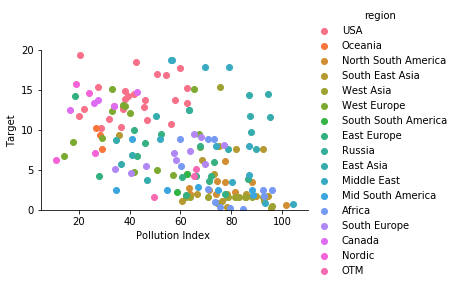

In [23]:
import seaborn
from  matplotlib import pyplot
from matplotlib.pyplot import figure
# 'Target', 'Pollution Index '
# Make 18 different random colors, one for each unique region
colors = []
for i in range(0, len(df['region'].unique())):
    rgb = (np.random.random(), np.random.random(), np.random.random())
    colors.append(rgb)
figure(num=None, figsize=(50, 40), dpi=80, facecolor='w', edgecolor='k')
df_plot = df[['Pollution Index ', 'Target', 'region']]
fg = seaborn.FacetGrid(data=df_plot, hue='region', aspect=1.61, ylim=(0,20))
fg.map(pyplot.scatter, 'Pollution Index ','Target').add_legend()
# region_group = df.groupby('region')
# region_group.get_group('Country').head()
# city_df = country_group.apply(lambda x: x['City'].unique())
# points = df[['Target', 'Pollution Index ']]
# for x, y in zip(x_)
# plt.scatter(points['Target'], points['Pollution Index '], c=df['region'].unique(), cmap='viridis')